In [84]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
#sns.set()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


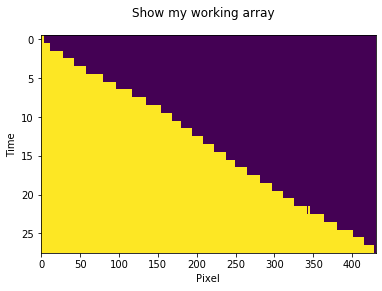

mean velocity = 15.33463498508452 std 79.60993665825441 mm/s


In [85]:
im = Image.open("fFase3ch1.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 

#see the array that you want to work and configure it
#The goal is the first row must start with yellow and the last must end with blue
work_array=pix_array[9:-6,3:-10]

#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

In [39]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array1 = np.array(edge_list)

(28,)


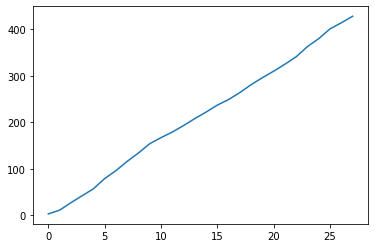

In [40]:
plt.plot(edge_array1)
last_pix = edge_array1.shape[0]
print(edge_array1.shape)

In [41]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array1)

In [42]:
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 431 slope= 15.756704980842912 r2= 0.9984353758458961


In [43]:
r2 = r_value**2
r2

0.9984353758458961

In [44]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

44.418553484278746 mm/s


0.013709430087740353

## Save data

In [47]:
df1 = pd.DataFrame({"pix": edge_list,
                   "time": list(range(last_pix)),
                   "ch": list(itertools.repeat(1, last_pix))

})

In [48]:
df1

,pix,time,ch
0,3,0,1
1,11,1,1
2,27,2,1
3,42,3,1
4,57,4,1
5,79,5,1
6,96,6,1
7,116,7,1
8,134,8,1
9,154,9,1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


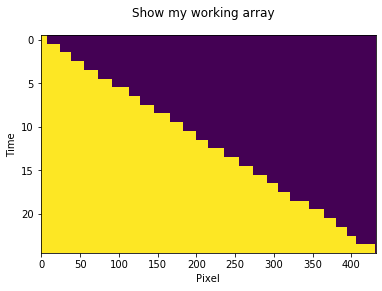

mean velocity = 17.2546875 std 84.45540829911256 mm/s


In [49]:
im = Image.open("fFase3ch2.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[3:-15,3:-10]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)


#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(25,)


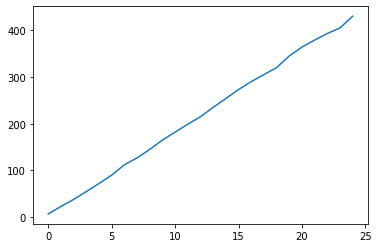

In [50]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array2 = np.array(edge_list)
plt.plot(edge_array2)
last_pix = edge_array2.shape[0]
print(edge_array2.shape)

In [51]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array2)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 432 slope= 17.75923076923077 r2= 0.9995843772770142


In [52]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

49.94783653846154 mm/s


0.015415998931623931

In [53]:
df2 = pd.DataFrame({"pix": edge_list,
                   "time": list(range(last_pix)),
                   "ch": list(itertools.repeat(2, last_pix))

})

In [54]:
df2

,pix,time,ch
0,7,0,2
1,23,1,2
2,38,2,2
3,55,3,2
4,72,4,2
5,90,5,2
6,112,6,2
7,127,7,2
8,145,8,2
9,165,9,2


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


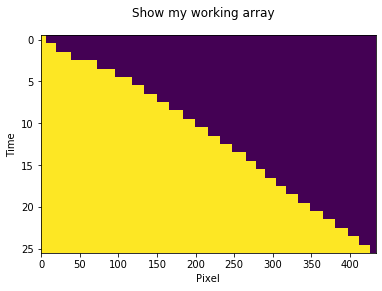

mean velocity = 16.398539968096422 std 81.92029208499632 mm/s


In [61]:
im = Image.open("fFase3ch3.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[4:-13,:-12]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(26,) 26


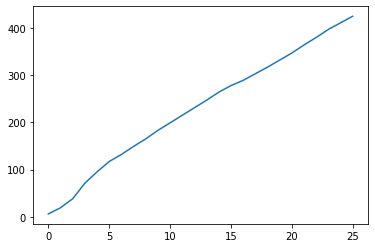

In [65]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array3 = np.array(edge_list)
plt.plot(edge_array3)
last_pix = edge_array3.shape[0]
print(edge_array3.shape, last_pix)

In [66]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(last_pix), edge_array3)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 434 slope= 16.380854700854705 r2= 0.9935780881574053


In [67]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

45.85884438142504 mm/s


0.014153964315254642

In [68]:
df3 = pd.DataFrame({"pix": edge_list,
                   "time": list(range(last_pix)),
                   "ch": list(itertools.repeat(3, last_pix))

})

In [69]:
df3

,pix,time,ch
0,6,0,3
1,19,1,3
2,38,2,3
3,71,3,3
4,95,4,3
5,117,5,3
6,132,6,3
7,149,7,3
8,165,8,3
9,183,9,3


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


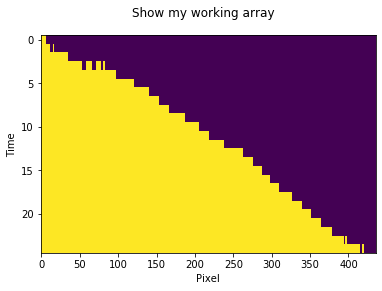

mean velocity = 16.73413990825688 std 81.90805087803064 mm/s


In [70]:
im = Image.open("fFase3ch4.tif")
l,w=im.size
pix_val = list(im.getdata())
#pix_array is the image turned into an array of pixels
pix_array = 255-np.array(list(im.getdata())).reshape((w,l)) #np.reshape(pix_array) 
#threshold values to 
'''
trh=1
pix_array[pix_array<=trh] = 1
pix_array[pix_array>trh] = 0
'''
#see the array that you want to work and configure it
work_array=pix_array[9:-9,:-8]
#count the 1s in the binary array in axis of choice
ones=np.count_nonzero(work_array,1)
#start the analysis
py,px=work_array.shape
size=45 #mm
Dtime=120 #s
pix_val= size/px
x=ones*(size/px)
velocity=np.empty(py)
for z in range(py-1):
    velocity[z]=(ones[z+1]-ones[z])*pix_val/Dtime
mean_vel=np.mean(velocity)

#Showing Data
plt.imshow(work_array)
plt.axes().set_aspect('auto')
plt.xlabel('Pixel')
plt.ylabel('Time')
plt.suptitle('Show my working array')
plt.show()
print("mean velocity =", mean_vel,"std",np.std(velocity) ,"mm/s")

(25,) 25


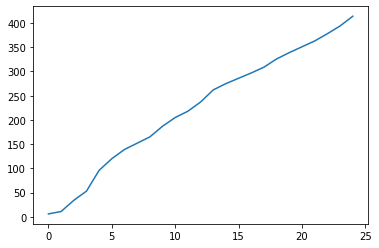

In [72]:
edge_list = [np.where(np.diff(work_array[i,:]))[0][0] for i in range(work_array.shape[0])]
edge_array4 = np.array(edge_list)
plt.plot(edge_array4)
last_pix = edge_array4.shape[0]
print(edge_array4.shape, last_pix)

In [73]:
slope, intercept, r_value, p_value, std_err = linregress(np.arange(25), edge_array4)
r2 = r_value**2
print('pixels =',px, 'slope=',slope,'r2=',r2)

pixels = 436 slope= 16.790769230769232 r2= 0.9866037031471024


In [74]:
vel = slope/Dtime*pix_val
#should give ~45
print(slope/Dtime*pix_val*3240,'mm/s')
vel

46.790790402258295 mm/s


0.014441601976005646

In [75]:
df4 = pd.DataFrame({"pix": edge_list,
                   "time": list(range(last_pix)),
                   "ch": list(itertools.repeat(4, last_pix))

})

In [76]:
df4

,pix,time,ch
0,6,0,4
1,11,1,4
2,34,2,4
3,53,3,4
4,96,4,4
5,120,5,4
6,139,6,4
7,152,7,4
8,165,8,4
9,187,9,4


In [80]:
fdf = df1.append([df2,df3,df4], ignore_index = True)

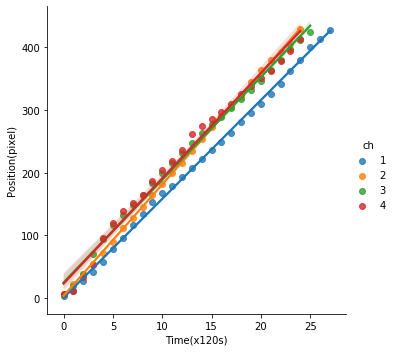

In [83]:
# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="time", y="pix", hue="ch",
               truncate=True, height=5, data=fdf)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Time(x120s)", "Position(pixel)")

In [183]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


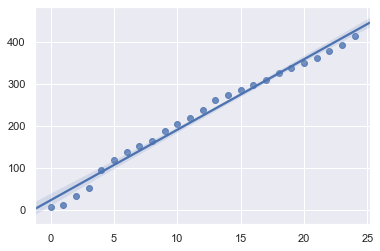

In [263]:
sns.regplot(np.arange(25), edge_array)